In [1]:
from premise import *
from premise import __file__
from datapackage import Package
import bw2io as bw
import bw2data
bw2data.projects.set_current("ecoinvent-3.10-consequential")

In [2]:
bw2data.databases

Databases dictionary with 11 object(s):
	ecoinvent-3.10-biosphere
	ecoinvent-3.10-consequential
	ei_consequential_3.10_modelremind_pathSSP2-NPi_year2090_argshort_slope
	ei_consequential_3.10_remind_SSP2-NPi_2090 2024-12-07
	test pierre
	test pierre 2
	test pierre 3
	test pierre 4
	test1
	test2
	test3

In [9]:
ndb = NewDatabase(
    scenarios=[
        {"model":"remind", "pathway":"SSP2-Base", "year":2020},
        {"model":"remind", "pathway":"SSP2-Base", "year":2030},
        {"model":"remind", "pathway":"SSP2-Base", "year":2040},
        {"model":"remind", "pathway":"SSP2-Base", "year":2050}, 
    ],
    source_db="ecoinvent-3.10-consequential", # <-- name of the database in the BW2 project. Must be a string.
    source_version="3.10", # <-- version of ecoinvent. Can be "3.5", "3.6", "3.7" or "3.8". Must be a string.
    key="tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=",
    biosphere_name="ecoinvent-3.10-biosphere",
    keep_imports_uncertainty=True,
    system_model="consequential"
)

premise v.(2, 2, 6)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [26]:
import numpy as np
data = []
for y, year in enumerate([2020, 2030, 2040, 2050]):
    for region in ndb.scenarios[y]["iam data"].electricity_markets.region.values:
        data.append([year, region] + np.squeeze(ndb.scenarios[y]["iam data"].electricity_markets.sel(region=region).values).tolist())

In [28]:
import pandas as pd
df = pd.DataFrame(data, columns=["year", "region"] + ndb.scenarios[0]["iam data"].electricity_markets.variables.values.tolist())

In [39]:
df.loc[(df["year"]==2050), "region":]

,region,Wind Offshore,Gas ST,Biomass IGCC,Coal PC CCS,Nuclear,"Storage, Hydrogen",Gas CC CCS,Solar CSP,Geothermal,...,Biomass CHP,Gas CC,Coal PC,Oil ST,Wind Onshore,Coal CHP,Hydro,Solar PV Centralized,Coal IGCC CCS,Biomass IGCC CCS
39,CAZ,-0.000000,-0.000000,0.028571,-0.0,0.057143,-0.0,-0.0,-0.000000,0.114286,...,-0.0,0.800000,0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0
40,CHA,-0.000000,-0.000000,0.010676,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.000000,...,-0.0,0.000000,0.989324,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0
41,EUR,0.244300,0.008143,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006515,...,0.0,0.000000,0.000000,0.0,0.483713,0.0,0.003257,0.254072,0.0,0.0
42,IND,0.033667,0.010009,0.000000,0.0,0.007279,0.0,0.0,0.018198,0.000000,...,0.0,-0.000000,0.000000,0.0,0.252047,0.0,0.007279,0.671520,0.0,0.0
43,JPN,-0.000000,-0.000000,0.090909,-0.0,0.363636,-0.0,-0.0,-0.000000,-0.000000,...,-0.0,0.136364,0.409091,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0
44,LAM,0.119221,0.007299,0.000000,0.0,-0.000000,0.0,0.0,0.019465,0.007299,...,0.0,0.000000,0.000000,0.0,0.281022,0.0,0.057178,0.508516,0.0,0.0
45,MEA,0.019100,0.008186,-0.000000,0.0,0.001364,0.0,0.0,0.020464,0.000000,...,0.0,0.114598,0.000000,0.0,0.120055,0.0,0.001364,0.714870,0.0,0.0
46,NEU,0.154762,0.000000,-0.000000,0.0,-0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.309524,0.0,0.035714,0.500000,0.0,0.0
47,OAS,0.129678,0.007833,0.000000,0.0,0.006092,0.0,0.0,0.000000,0.010444,...,0.0,0.000000,0.000000,0.0,0.197563,0.0,0.013925,0.634465,0.0,0.0
48,REF,0.013228,0.005291,0.000000,0.0,0.000000,0.0,0.0,0.023810,-0.000000,...,0.0,0.468254,0.000000,0.0,0.042328,0.0,0.015873,0.431217,0.0,0.0


Object `plot` not found.


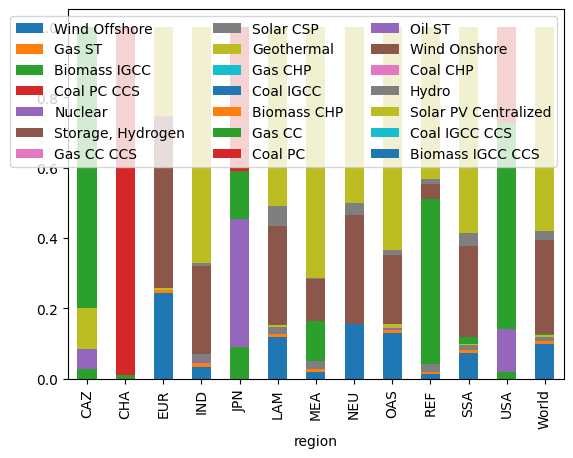

In [51]:
import matplotlib.pyplot as plt
df.loc[(df["year"]==2050), "region":].plot(kind="bar", stacked=True, xlabel="region")
plt.xticks(ticks=range(0, 13), labels=df.loc[(df["year"]==2050), "region"].values.tolist())
plt.legend(ncols=3)